## One-dimentional Scrodinger equation

Numerical methods are used to solve the eigenvalue problem. The equation of one-dimensional Scrodinger is given by:
$$\frac{-ℏ^2}{2m}\frac{d^2ψ(x)}{dx^2}+V(x)ψ(x) = Eψ(x)$$
 
Where:

$ψ(x)$ = Wavefunction of the particle

$E$ = Energy value to be determined

$V(x)$ = Potential energy function

$m$ = Mass of the particle

$ℏ$ = Planck's constant

However in the calculation we use $ℏ=m=1$

To solve this problem numerically, we need to:
1. Determine the energy $E_n$ according to the particular quantum number.
2. Compute the corresponding wavefunction $ψ_n(x)$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Define all the parameters involved.

In [5]:
N = 1000           # Number of points
max_iter = 10      # Maximum iterations
xi = -10           # Left boundary of x domain
xf = 10            # Right boundary of x domain
hbar = 1
alpha = 1
lambd = 4
m = 1

h = (xf - xi) / N  # Step size

In [7]:
# Arrays for computations
ul = np.zeros(N + 1)   # Left wavefunction
ur = np.zeros(N + 1)   # Right wavefunction
ql = np.zeros(N + 1)   # Potential dependent q(x) for left part
qr = np.zeros(N + 1)   # Potential dependent q(x) for right part
s = np.zeros(N + 1)
u = np.zeros(N + 1)    # Combined wavefunction

Initial guess for the energy $E_n$ is calculated as:
$$E_n=\frac{ℏ^2 α^2}{2m}[\frac{λ(λ−1)}{2}-(λ-1-n)^2]$$

Where n is the quantum number, α = 1 and λ = 4.

In [1]:
def main():
    tol = 1e-6  
    n = 2       # Quantum number n=2
    
    # Exact eigenvalue formula given in the assignment
    e = ((hbar**2) * (alpha**2) / (2 * m)) * (((lambd * (lambd - 1)) / 2) - ((lambd - 1 - n) ** 2))
    print("Initial energy guess:", e)
    
    # Energy step used in Secant method
    de = 0.1    

    # Find the eigenvalue via secant search
    e = secant(max_iter, tol, e, de)

    # Compute x and u values
    x_values = []
    u_values = []
    x = xi
    
    for i in range(0, N + 1, m):
        x_values.append(x)
        u_values.append(u[i])
        x += h

    # Plot both the potential, wavefunction and energy
    plot_potential_wavefunction_energy(x_values, u_values, e)

    # Print the eigenvalue
    print("The eigenvalue:", e)

The secant method is an iterative technique for finding the root of a non-linear equation $f(x)=0$. In this case,

1. $f(e)$ represents the mismatch in the wavefunction boundary conditions at the turning point.
2. The secant method finds the energy eigenvalue such that $f(e)=0$ ensuring the wavefunction is continuous abd satisfies the boundary conditions.

The secant method formula for this case is given by:
$$ e_{i+1} =e_i - f(e)\frac{Δe}{f(e+Δe)-f(e)} $$


In [13]:
# Secant method
def secant(max_iter, tol, e, de):
    f0 = f(e)         # f(e) represents the mismatch in the boundary conditions of Schrodinger function at the turning point
    f1 = f(e + de)    # To compute the wavefunction mismatch for the higher energy
    
    while abs(f1) > tol:   # Continue until the function value is within the tolerance 
        E = e              # Save the current energy value to recalculate the energy step
        e = e - f1 * de / (f1 - f0)   # Secant method formula
        f0 = f1
        f1 = f(e)
        de = e - E
    return e

This part is used to calculate the wavefunction mismatch for a given energy.

The function f(energy):
1. Compute the mismatch in the wavefunction derivatives at the turning point $x_r$ for a given energy.
2. This mismatch is evaluated using theree-point formula for derivatives which approximates the first derivative at the turning point.

The result f(energy) is used in the secant method to iteratively improve the energy eigenvalues.

The three-point formula is given by:
$$f(E) = \frac{[ψ_l(x_r+h)-ψ_l(x_r-h)]-[ψ_r(x_r+h)-ψ_r(x_r-h)]}{2hψ(x_r)}$$

In [16]:
# Calculate the wavefunction mismatch for a given energy
def f(energy):
    wave(energy)  
    f0 = ur[nr - 1] + ul[nl - 1] - ur[nr - 3] - ul[nl - 3]  # Comes from three-point formula
    return f0 / (2 * h * ur[nr - 2])                        # Comes from three-point formula

In order to find the turning point $x_r$, where $E=V(x)$, we find that when q(x) changes in its sign. q(x) is given by:
$$q(x) = \frac{2m(E-V(x))}{ℏ^2}$$

Then Numerov algorithm is used to integrate the Scrodinger equation from:
1. The left boundary xi to $x_r+h$.
2. The right boundary xf to $x_r-h$.

At the turning point $x_r$, the continuity are:
$$ψ_l(x_r) = ψ_r(x_r)$$
$$ψ'_l(x_r) = ψ'_r(x_r)$$

If we combine these two conditions, we get:
$$\frac{ψ'_l(x_r)}{ψ_l(x_r)} = \frac{ψ'_r(x_r)}{ψ_r(x_r)}$$

When we get the ratio:
$$ratio = \frac{ψ_r(x_r)}{ψ_l(x_r)}$$
Multiply the ratio with $ψ_l(x_r)$ values will give $ψ_l(x_r) = ψ_r(x_r)$.

Then we have to ensure that the wavefunction $ψ(x)$ satisfies the normalization condition:
$$∫|ψ(x)|^2 dx = 1$$

We use the Simpson's rule to integrate $|ψ(x)|^2$ to integrate. Then we divide $ψ(x)$ by the square root of the integral to normalize it.


In [19]:
# nl = number of points for the left integration
# nr = number of points for the right integration
def wave(energy):
    global ul, ur, u, nr, nl

    # Set up the q(x) function
    for i in range(N + 1):
        x = xi + (i * h)
        ql[i] = 2 * (energy - v(x))  # q(x) = 2m(E−V(x))/ℏ**2
        qr[N - i] = ql[i]

    # Find the matching point at the right turning point
    im = 0
    for i in range(N):
        if (ql[i] * ql[i + 1] < 0) and ql[i] > 0:
            im = i

    # Carry out Numerov integrations
    nl = im + 2
    nr = N - im + 2
    ul = numerov(nl, h, 0, 0.01, ql, s)  # Integrate left wavefunction from xi to turning point
    ur = numerov(nr, h, 0, 0.01, qr, s)  # Integrate right wavefunction from xf to turning point

    # Left wavefunction
    ratio = ur[nr - 2] / ul[im]
    for i in range(im + 1):
        u[i] = ratio * ul[i]

    # Combine the scaled wavefunction with right wavefunction to form the complete wavefunction
    for i in range(nr - 1):
        u[i + im] = ur[nr - i - 2]

    # Normalize the wavefunction
    y = u ** 2
    sum_y = simpson(y, h)
    norm_factor = np.sqrt(sum_y)
    u /= norm_factor

Numerov method solves second order differential equations like Scrodinger equation. 

Scrodinger equation can be written as:
$$\frac{d^2ψ(x)}{dx^2}+q(x) = s(x)$$

Where $$q(x) = \frac{2m}{ℏ^2}(E-V(x))$$

The Numerov algorithm discretizes the differential equation as:
$$ψ_{i+1}=\frac{2(1-5gq_i)ψ_i-(1+gq_{i-1})ψ_{i-1}+g(s_{i+1}+10s_i+s_{i-1})}{1+gq_{i+1}}$$

The scaling factor in the Numerov method is given by:
$$g=\frac{h^2}{12}$$

In [22]:
def numerov(m, h, u0, u1, q, s):
    u = np.zeros(m)
    u[0] = u0
    u[1] = u1
    
    # Scaling factor
    g = h**2 / 12
    
    for i in range(1, m - 1):
        c0 = 1 + g * q[i - 1]
        c1 = 2 - 10 * g * q[i]
        c2 = 1 + g * q[i + 1]
        d = g * (s[i + 1] + s[i - 1] + 10 * s[i])
        
        # Numerov algorithm
        u[i + 1] = (c1 * u[i] - c0 * u[i - 1] + d) / c2
    return u

In Schrodinger equation, Simpson's rule is used to normalize the wavefuntion $ψ(x)$. This ensure that the total probability of finding a particle in all space is equal to 1.

The wavefunction $ψ(x)$ have to satisfies the normalization condition:
$$∫|ψ(x)|^2 dx = 1$$

1. The wavefunction is computed numerically over [xi, xf] as $ψ(x)→0$
2. The integral is approximated using Simpson's rule over discrete points.

Simpson's rule formula is given by:
$$\int_{xi}^{xf} |ψ(x)|^2 dx=\frac{h}{3}[y_0+4(y_1+y_3+...)+2(y_2+y_4+...)+y_i]$$

Where $y_i=|ψ(x_i)|^2$

After calculating the integral, the wavefunction is normalized:
$$ψ(x)→\frac{ψ(x)}{\sqrt{∫|ψ(x)|^2 dx}}$$


In [25]:
# Simpson's function
def simpson(y, h):
    n = len(y)
    sum_y = y[0] + y[-1]
    
    # Odd indexed term
    sum_y += 4 * np.sum(y[1:n - 1:2])
    
    # Even indexed term
    sum_y += 2 * np.sum(y[2:n - 1:2])
    
    return sum_y * h / 3

The potential function V(x) is given by:
$$V(x)=\frac{ℏ^2}{2m}α^2λ(λ−1)[\frac{1}{2}-\frac{1}{cosh^2(αx)}]$$

In [28]:
# Potential function
def v(x):
    return ((alpha**2 * lambd * (lambd - 1) * (0.5 - 1 / np.cosh(alpha * x) ** 2)) / 2 * m)

Initial energy guess: 2.5


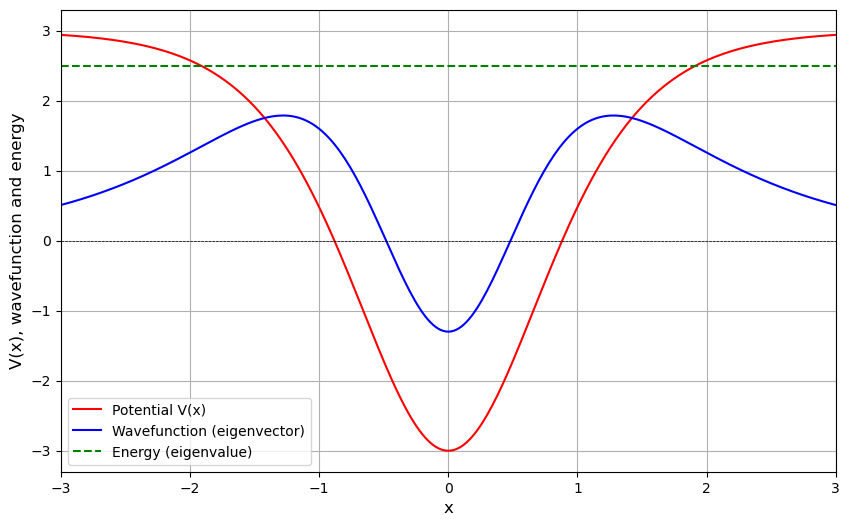

The eigenvalue: 2.4999999827589643


In [30]:
def plot_potential_wavefunction_energy(x_values, u_values, e):
    # Compute potential values
    v_values = [v(x) for x in x_values]

    # Scale the wavefunction for visualization
    u_scaled = [3 * u for u in u_values]  # Scaling factor (3) for better visualization

    # Plot both potential and wavefunction
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, v_values, label="Potential V(x)", color="red")
    plt.plot(x_values, u_scaled, label="Wavefunction (eigenvector)", color="blue")
    plt.axhline(e, color="green", linestyle="--", label=f"Energy (eigenvalue)")
    plt.axhline(0, color="black", lw=0.5, linestyle="--")
    plt.xlabel("x", fontsize=12)
    plt.xlim(-3,3)
    plt.ylabel("V(x), wavefunction and energy", fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()


if __name__ == "__main__":
    main()